C:\Users\User\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


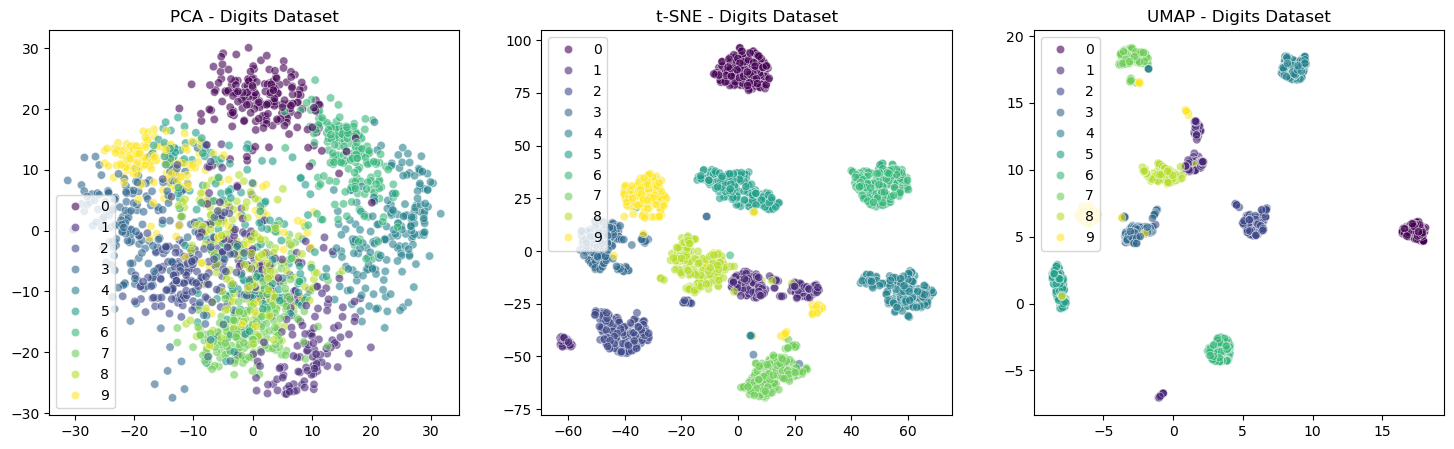

C:\Users\User\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


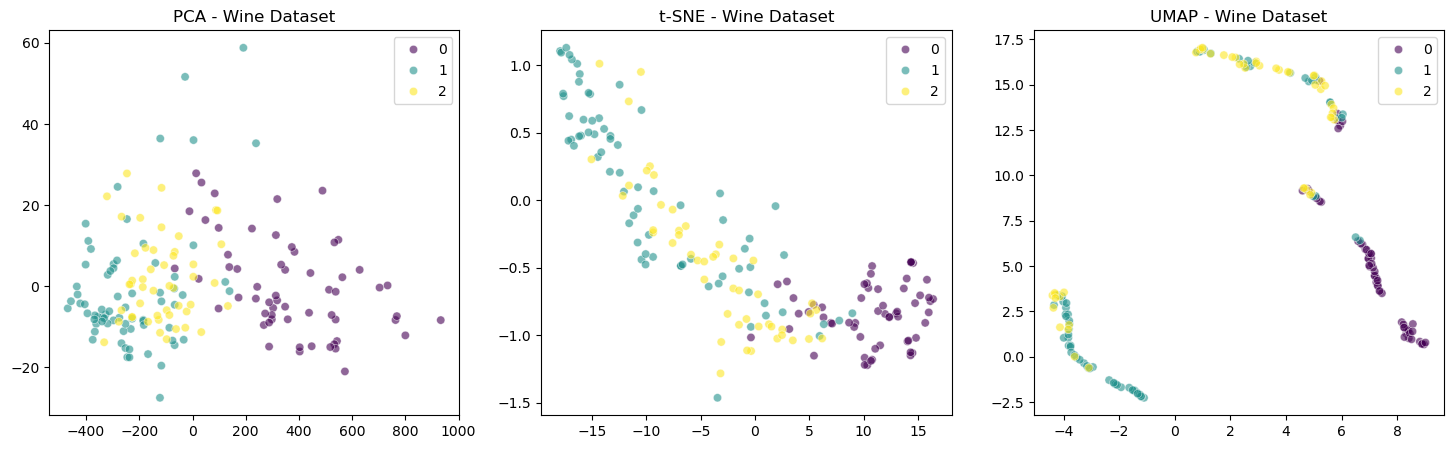

In [3]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.datasets import load_digits, load_wine

# Load datasets
X1, y1 = load_digits(return_X_y=True)
X2, y2 = load_wine(return_X_y=True)

# Fungsi untuk menerapkan reduksi dimensi dan visualisasi
def visualize_reduction(X, y, title):
    # Menyesuaikan perplexity untuk T-SNE
    perplexity_value = min(30, len(X) // 3)

    # Inisialisasi metode reduksi dimensi
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, n_iter=5000, random_state=42)
    umap = UMAP(n_components=2, random_state=42)

    # Transformasi data
    X_pca = pca.fit_transform(X)
    X_tsne = tsne.fit_transform(X)
    X_umap = umap.fit_transform(X)

    # Plot hasil reduksi dimensi
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for ax, X_red, method in zip(axes, [X_pca, X_tsne, X_umap], ["PCA", "t-SNE", "UMAP"]):
        sns.scatterplot(x=X_red[:, 0], y=X_red[:, 1], hue=y, palette="viridis", ax=ax, alpha=0.6, legend="full")
        ax.set_title(f"{method} - {title}")

    plt.show()

# Visualisasi kedua dataset
visualize_reduction(X1, y1, "Digits Dataset")
visualize_reduction(X2, y2, "Wine Dataset")